# Parte Práctica

Pricila Badilla

Queremos desarrollar una máquina capaz de ganar al juego "Piedra Hoja Tijeras" anticipando el gesto del adversario.
Suponemos que tenemos acceso a datos de sensores EMG (electromigrafía) que miden en tiempo real la actividad muscular del adversario.

Tenemos a nuestra disposición un dataset que contiene observaciones de 3 tipos de gestos: piedra (0), hoja (1) y tijeras (2).
Por cada observación, tenemos acceso a 8 sensores musculares y se recopila 8 mediciones de cada sensor justo antes de que el jugador revele su gesto. Es decir, tenemos 64 mediciones por cada observación.

Descargar [dataset](https://github.com/magister-informatica-uach/INFO268/tree/master/unidad1/prueba2/dataset-prueba2.csv) 


Queremos aprender un modelo de clasificación capaz de predecir que gesto va a hacer el jugador. 

1) Desarrollar un script python para entrenar y evaluar al menos 3 modelos de clasificación distintos, limpiando o transformando los datos si lo estiman necesario.

2) ¿Qué precisión y recall obtiene?

3) ¿Cómo se comparta los puntajas de precisión y recall según el tamaño del dataset de entrenamiento? Probar con varios tamaño de dataset de entrenamiento y graficar las curvas de Precicion o Recall según el tamaño del dataset de entrenamiento. ¿Qué observan? 

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv(r'./dataset-prueba2.csv', names=['S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18',
             'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28',
             'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38',
             'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48',
             'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58',
             'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68',
             'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78',
             'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88','R'])

In [29]:
df.head()

,S11,S12,S13,S14,S15,S16,S17,S18,S21,S22,...,S78,S81,S82,S83,S84,S85,S86,S87,S88,R
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [31]:
df.isnull().sum()

S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S21    0
S22    0
S23    0
S24    0
S25    0
S26    0
S27    0
S28    0
S31    0
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
      ..
S54    0
S55    0
S56    0
S57    0
S58    0
S61    0
S62    0
S63    0
S64    0
S65    0
S66    0
S67    0
S68    0
S71    0
S72    0
S73    0
S74    0
S75    0
S76    0
S77    0
S78    0
S81    0
S82    0
S83    0
S84    0
S85    0
S86    0
S87    0
S88    0
R      0
Length: 65, dtype: int64

No hay datos vacíos

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 65 columns):
S11    8756 non-null float64
S12    8756 non-null float64
S13    8756 non-null float64
S14    8756 non-null float64
S15    8756 non-null float64
S16    8756 non-null float64
S17    8756 non-null float64
S18    8756 non-null float64
S21    8756 non-null float64
S22    8756 non-null float64
S23    8756 non-null float64
S24    8756 non-null float64
S25    8756 non-null float64
S26    8756 non-null float64
S27    8756 non-null float64
S28    8756 non-null float64
S31    8756 non-null float64
S32    8756 non-null float64
S33    8756 non-null float64
S34    8756 non-null float64
S35    8756 non-null float64
S36    8756 non-null float64
S37    8756 non-null float64
S38    8756 non-null float64
S41    8756 non-null float64
S42    8756 non-null float64
S43    8756 non-null float64
S44    8756 non-null float64
S45    8756 non-null float64
S46    8756 non-null float64
S47    8756 non-null fl

Como con cada sensor se tomaron 8 observaciones, vamos a calcular el promedio para cada sensor muscular.

In [112]:
a = df[['S11', 'S21', 'S31', 'S41', 'S51', 'S61', 'S71', 'S81']].mean(axis=1)
b = df[['S12', 'S22', 'S32', 'S42', 'S52', 'S62', 'S72', 'S82']].mean(axis=1)
c = df[['S13', 'S23', 'S33', 'S43', 'S53', 'S63', 'S73', 'S83']].mean(axis=1)
d = df[['S14', 'S24', 'S34', 'S44', 'S54', 'S64', 'S74', 'S84']].mean(axis=1)
e = df[['S15', 'S25', 'S35', 'S45', 'S55', 'S65', 'S75', 'S85']].mean(axis=1)
f = df[['S16', 'S26', 'S36', 'S46', 'S56', 'S66', 'S76', 'S86']].mean(axis=1)
g = df[['S17', 'S27', 'S37', 'S47', 'S57', 'S67', 'S77', 'S87']].mean(axis=1)
h = df[['S18', 'S28', 'S38', 'S48', 'S58', 'S68', 'S78', 'S88']].mean(axis=1)

In [113]:
df2 = pd.concat([a,b,c,d,e,f,g,h,df["R"]], axis =1)
df2.head()

,0,1,2,3,4,5,6,7,R
0,8.000,1.500,0.875,0.500,-2.125,-4.750,-48.000,-9.375,0
1,-2.875,0.000,1.125,0.500,4.875,6.375,4.250,-3.750,0
2,-5.250,-1.750,-2.750,-2.875,-1.375,-5.625,-13.750,0.250,0
3,-2.375,-0.625,-0.375,-0.125,3.375,4.500,9.000,-2.500,0
4,-6.000,-0.625,0.375,0.500,-2.875,-2.875,-32.125,-7.000,0


plt.figure(figsize=(12, 12))
sb.heatmap(df2.corr(),annot=True)

In [241]:
X= df.iloc[:,:-1]
y = df.iloc[:,len(df.columns)-1:]

'''
X= df2.iloc[:,:-1]
y = df2.iloc[:,len(df2.columns)-1:]
'''

'\nX= df2.iloc[:,:-1]\ny = df2.iloc[:,len(df2.columns)-1:]\n'

Estuve entre la duda si usar df2 que cree (con los promedios) o df con todos los datos (sin filtros). Finalmente usé df

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

       S11   S12   S13   S14   S15   S16   S17   S18   S21   S22  ...     S77  \
7997  -4.0 -31.0  10.0  -6.0 -23.0  -1.0  -1.0  -2.0 -23.0 -31.0  ...    -2.0   
6781  -6.0  -9.0  -5.0  -5.0 -16.0 -15.0  -9.0 -35.0   3.0  -8.0  ...   -12.0   
920   83.0   8.0  -6.0 -13.0  13.0 -41.0 -38.0 -21.0   7.0  12.0  ...    -7.0   
2322  18.0  17.0 -11.0  -9.0  -2.0 -37.0 -25.0   8.0 -50.0  25.0  ...    14.0   
5569  10.0   2.0  -4.0 -10.0   8.0  15.0  -2.0   0.0  -1.0  -2.0  ...    -3.0   
5435  -9.0   1.0   2.0   3.0   4.0 -12.0   1.0   8.0   1.0  -5.0  ...     4.0   
2280   3.0  36.0   1.0  -6.0   0.0  63.0  -3.0  23.0  -3.0 -37.0  ...    11.0   
1831  -1.0  -2.0   0.0   5.0   3.0  -3.0   6.0  -1.0   3.0   2.0  ...    13.0   
2507  13.0  -3.0   1.0  12.0  -4.0  -6.0 -21.0 -25.0 -14.0  -2.0  ...    -9.0   
1252   5.0 -27.0   2.0   4.0  12.0  -2.0  18.0   1.0   1.0  18.0  ...    -7.0   
4864   4.0  -2.0  -4.0  -1.0  12.0  11.0  -1.0   4.0  -2.0  -3.0  ...    -2.0   
6529  18.0  19.0   4.0   0.0

**Árbol de Decision**

In [243]:
from sklearn.model_selection import train_test_split
from sklearn import tree

#entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [244]:
#Predicciones
y_pred = clf.predict(X_test)

In [245]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[782  15  93]
 [ 10 751  87]
 [ 63  94 732]]


In [246]:
'''Print de la matriz de confusión'''

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       890
           1       0.87      0.89      0.88       848
           2       0.80      0.82      0.81       889

   micro avg       0.86      0.86      0.86      2627
   macro avg       0.86      0.86      0.86      2627
weighted avg       0.86      0.86      0.86      2627



**Regresión Logística**

In [247]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [248]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[-3.39817617e-04  1.17208510e-03 -3.43428425e-05 -2.01776581e-03
   1.11405350e-03  2.09951600e-03 -9.52807311e-03  6.00188596e-03
  -9.79923382e-04  5.38488902e-04  1.30055612e-03 -3.28866716e-03
   1.00106025e-03  3.86095069e-03 -1.44331346e-02  8.20349753e-03
  -2.17813264e-03  1.88457398e-03 -2.50264168e-04 -4.83438567e-03
   5.48188972e-04  5.05994800e-03 -1.61244976e-02  6.39103917e-03
  -1.50217868e-03  4.92117197e-04 -1.01051402e-03 -4.29224259e-03
   2.89024709e-03  4.47113038e-03 -2.04239816e-02  9.53936898e-03
  -2.87574230e-03 -1.81167373e-05  2.83836979e-03 -8.32761088e-03
   2.50423863e-03  2.58516237e-03 -2.34517521e-02  1.33112483e-02
  -2.41399850e-03  2.26852997e-03  6.42261607e-03 -7.88429014e-03
   5.14596101e-03  2.47450680e-03 -1.99534320e-02  8.54850268e-03
  -2.72543425e-03 -1.08609321e-03  6.65368077e-03 -1.26823082e-02
   3.25290203e-03  2.14288770e-03 -1.54223338e-02  7.77921834e-03
  -1.22043307e-03  6.86091327e-05  6.69875833e-04 -

In [249]:
y_pred = LogReg.predict(X_test)

In [250]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.45      0.51       890
           1       0.39      0.44      0.41       848
           2       0.38      0.42      0.40       889

   micro avg       0.44      0.44      0.44      2627
   macro avg       0.45      0.44      0.44      2627
weighted avg       0.45      0.44      0.44      2627



**Random Forest**

In [251]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)

#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[871   3  16]
 [  2 798  48]
 [ 46  22 821]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       890
           1       0.97      0.94      0.96       848
           2       0.93      0.92      0.93       889

   micro avg       0.95      0.95      0.95      2627
   macro avg       0.95      0.95      0.95      2627
weighted avg       0.95      0.95      0.95      2627



Mejor precisión y recall se obtuvo con el modelo de Random Forest y Árbol de Decisión.

**3) ¿Cómo se comparta los puntajas de precisión y recall según el tamaño del dataset de entrenamiento? Probar con varios tamaño de dataset de entrenamiento y graficar las curvas de Precicion o Recall según el tamaño del dataset de entrenamiento. ¿Qué observan?**

**Dataset entrenamiento pequeño**

2626*64

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=25)
print(X_train)

       S11   S12   S13   S14   S15    S16   S17   S18   S21   S22  ...    S77  \
1735   0.0  10.0   5.0  21.0   2.0   -8.0  15.0  19.0 -12.0 -15.0  ...   -9.0   
2387 -12.0 -15.0  -8.0  -7.0   3.0  -22.0   6.0   7.0  -7.0  16.0  ...   42.0   
74    10.0   0.0   0.0   3.0   6.0   19.0  54.0  27.0  12.0  -2.0  ...   23.0   
621  -22.0  -4.0  -1.0   1.0  -5.0  -15.0 -22.0  40.0  32.0   3.0  ...  -12.0   
8370  -1.0   1.0  -2.0   3.0  -5.0  -12.0  -3.0 -24.0 -24.0  -3.0  ...   -1.0   
587  -10.0  -2.0  -1.0  10.0   8.0   -6.0  34.0  23.0 -19.0   1.0  ...    3.0   
7190  -3.0 -16.0  -9.0  -8.0   3.0   33.0  -2.0  -8.0 -14.0  35.0  ...   -3.0   
8025  10.0 -34.0 -11.0  -5.0  -5.0   26.0  -1.0   6.0 -16.0   4.0  ...   -3.0   
379   29.0  11.0   6.0   4.0   9.0   24.0 -12.0  39.0 -26.0 -12.0  ...  -18.0   
4257   9.0   3.0   2.0   4.0   4.0    1.0   1.0  -1.0  -8.0  -5.0  ...    3.0   
8529  66.0  17.0  -5.0   0.0  23.0   20.0  -3.0   0.0  -4.0   1.0  ...   -2.0   
3981   2.0   1.0   3.0   5.0

C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [253]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [254]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1802   26  234]
 [  19 1744  265]
 [ 204  216 1620]]


In [255]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2062
           1       0.88      0.86      0.87      2028
           2       0.76      0.79      0.78      2040

   micro avg       0.84      0.84      0.84      6130
   macro avg       0.84      0.84      0.84      6130
weighted avg       0.84      0.84      0.84      6130



**Para un Dataset entrenamiento más pequeño**

875*64

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1, random_state=25)
print(X_train)

       S11   S12   S13   S14   S15    S16    S17   S18   S21   S22  ...   \
3042   5.0  -5.0  -4.0  -3.0  12.0    9.0   -4.0   2.0 -45.0  -9.0  ...    
5537  52.0   4.0   1.0   6.0  -6.0  -10.0    7.0  29.0  -9.0   1.0  ...    
506   38.0   0.0   7.0  16.0 -38.0   -6.0  127.0  40.0 -25.0  -2.0  ...    
4969  25.0   3.0   4.0   5.0  -4.0   -6.0    2.0  10.0  -9.0  -2.0  ...    
719    1.0  -3.0  -7.0  -6.0 -31.0   -7.0  -71.0 -43.0 -57.0  16.0  ...    
8353  -7.0 -32.0  -7.0  -7.0  27.0    8.0    0.0   5.0   3.0  19.0  ...    
1208  -7.0   4.0  -2.0  -9.0  -4.0  -17.0  -27.0   1.0 -12.0   3.0  ...    
308    8.0   3.0   1.0   5.0   4.0   -8.0  -20.0  11.0 -52.0 -10.0  ...    
6705   3.0 -14.0  -6.0  -5.0  15.0    9.0   -1.0 -18.0   1.0  15.0  ...    
8488  -3.0  12.0  -6.0  -9.0 -12.0  -70.0  -17.0   4.0  20.0  20.0  ...    
2623  -4.0  -2.0   0.0   6.0   8.0   10.0   25.0  21.0   2.0  -1.0  ...    
6961 -12.0 -78.0  -5.0  -8.0  -9.0   -5.0   -2.0  -7.0  25.0  15.0  ...    
3497 -57.0  

C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [257]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

[[2135   54  435]
 [  49 2262  287]
 [ 443  275 1941]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2624
           1       0.87      0.87      0.87      2598
           2       0.73      0.73      0.73      2659

   micro avg       0.80      0.80      0.80      7881
   macro avg       0.80      0.80      0.80      7881
weighted avg       0.80      0.80      0.80      7881



**Dataset entrenamiento aún más pequeño**

87*64

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.01, random_state=25)
print(X_train)

       S11   S12   S13   S14   S15    S16    S17   S18   S21   S22  ...   \
7500   2.0 -15.0  -8.0  -6.0 -21.0  -17.0   -3.0   5.0  12.0  -1.0  ...    
5712  -5.0  -5.0   0.0  -7.0 -73.0  -34.0   -3.0 -13.0 -19.0   8.0  ...    
1251  18.0  -9.0  -2.0  15.0   5.0   17.0 -116.0  -6.0 -24.0  -3.0  ...    
4368 -14.0  -1.0   0.0   2.0 -39.0   -5.0   -2.0  -2.0  47.0   3.0  ...    
8576   8.0   7.0   2.0   1.0  24.0   16.0    1.0  13.0  -6.0  10.0  ...    
840   60.0  12.0 -10.0 -36.0  -3.0    6.0   14.0   2.0   1.0 -13.0  ...    
1859  -3.0   7.0  -6.0  -8.0  -3.0  -11.0    3.0 -10.0  -5.0   3.0  ...    
2103 -22.0   6.0   1.0   6.0  16.0   20.0   36.0   4.0  12.0 -17.0  ...    
6433 -24.0   0.0  -4.0   5.0  -1.0    6.0   -8.0 -23.0  -3.0  22.0  ...    
1454  -3.0   0.0  -2.0  -3.0   2.0  -10.0  -39.0 -58.0   4.0   1.0  ...    
6483 -20.0 -13.0  -1.0  -5.0   0.0   -4.0   -7.0   8.0 -16.0  -2.0  ...    
583   36.0  -1.0  -1.0   4.0  -9.0   10.0   11.0   7.0 -12.0  -2.0  ...    
8076  -6.0  

C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [259]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

[[2302  103  474]
 [ 133 2204  539]
 [ 770  491 1653]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2879
           1       0.79      0.77      0.78      2876
           2       0.62      0.57      0.59      2914

   micro avg       0.71      0.71      0.71      8669
   macro avg       0.71      0.71      0.71      8669
weighted avg       0.71      0.71      0.71      8669



Mientras más pequeño es el dataset de entrenamiento, menor es la precision y recall, debido a que no representan un conjunto significativo de datos para el análisis.

C:\Users\Pricila\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


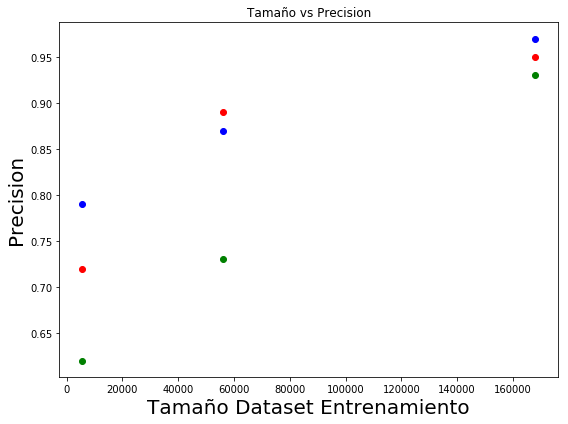

In [315]:
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True, sharex=True, sharey=True)
x = np.arange(8756*64)
y = np.arange(0,1)

plt.xlabel('Tamaño Dataset Entrenamiento', size=20)
plt.ylabel('Precision',size=20)

plt.title('Tamaño vs Precision')

plt.plot([2626*64,875*64,87*64],[0.95, 0.89, 0.72],'ro',color="RED")
plt.plot([2626*64,875*64,87*64],[0.97, 0.87, 0.79],'ro',color="BLUE")
plt.plot([2626*64,875*64,87*64],[0.93, 0.73, 0.62],'ro',color="GREEN")

plt.show()

    Rojo es el caso de 0
    Azul es el caso de 1
    Verde es el caso de 2
    
En los tres casos de ve que a medida que aumenta la dataset de entrenamiento (eje x) la precision aumenta (eje y)